# r.earthworks
This notebook runs the example from r.earthworks's manual page and visualizes the output.

## Setup
Start a GRASS session in the North Carolina basic sample dataset.

In [52]:
import os
import json
import subprocess
import sys

# Ask GRASS GIS where its Python packages are
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Start GRASS session
session = gj.init("~/grassdata/nc_basic_spm_grass7/user1")

Install the addon.

In [53]:
# Install addon
gs.run_command("g.extension", extension="r.earthworks")

## Operations

Set the computational region and generate a flat terrain with map algebra.

In [54]:
# Set region
gs.run_command("g.region", n=500, e=500, s=0, w=0, res=1)

# Generate elevation
gs.mapcalc("elevation = 0")

### Fill Operation
Model a peak from a set of x- and y-coordinates with `r.earthworks`. Use the `z` parameter to set a z-coordinate for the top of the peak. Optionally use the `flat` parameter to create a plateau at the top of the peak. 

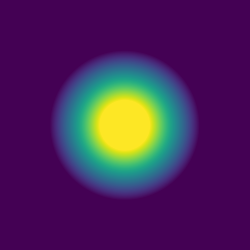

In [55]:
# Model earthworks
gs.run_command(
    "r.earthworks",
    elevation="elevation",
    earthworks="peak",
    operation="fill",
    function="linear",
    linear=0.5,
    coordinates=[250, 250],
    z=50,
    flat=50,
)

# Visualize
m = gj.Map(width=250)
m.d_rast(map="peak")
m.show()

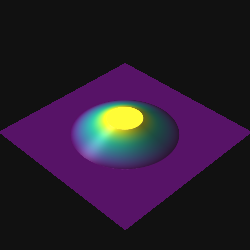

In [56]:
# Visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="peak", height=1000, perspective=25, bgcolor=[17, 17, 17])
map3d.show()

### Cut Operation
Model a pit from a set of x- and y-coordinates with `r.earthworks`. Set a z-coordinate for the bottom of the pit.

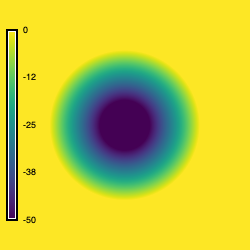

In [57]:
# Model earthworks
gs.run_command(
    "r.earthworks",
    elevation="elevation",
    earthworks="pit",
    operation="cut",
    coordinates=[250, 250],
    z=-50,
    flat=50,
    linear=0.5,
)

# Visualize
m = gj.Map(width=250)
m.d_rast(map="pit")
m.d_legend(raster="pit")
m.show()

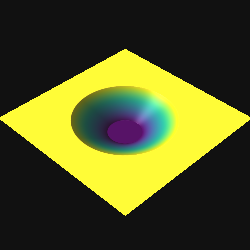

In [58]:
# Visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(elevation_map="pit", height=1000, perspective=25, bgcolor=[17, 17, 17])
map3d.show()

### Cut & Fill Operation
Model a pit and a peak from two sets of x- and y-coordinates with `r.earthworks`. Set a z-coordinate for the bottom of the pit and another z-coordinate for the top of the peak.

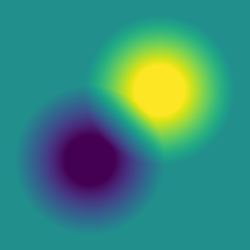

In [59]:
# Model earthworks
gs.run_command(
    "r.earthworks",
    elevation="elevation",
    earthworks="pit_and_peak",
    operation="cutfill",
    function="linear",
    linear=0.5,
    coordinates=[180, 180, 320, 320],
    z=[-50, 50],
    flat=50,
)

# Visualize
m = gj.Map(width=250)
m.d_rast(map="pit_and_peak")
m.show()

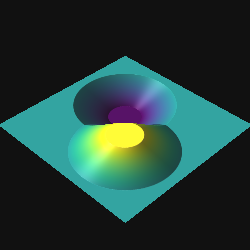

In [60]:
# Visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(
    elevation_map="pit_and_peak", height=1000, perspective=25, bgcolor=[17, 17, 17]
)
map3d.show()

### Random Earthworks
Model random peaks with `r.random` and `r.earthworks`.

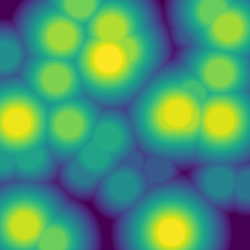

In [46]:
# Generate random points
gs.run_command("r.surf.random", out="surface", min=0, max=25)
gs.run_command(
    "r.random",
    input="elevation",
    npoints=50,
    cover="surface",
    raster="random",
    flags="s",
)

# Model earthworks
gs.run_command(
    "r.earthworks",
    elevation="elevation",
    earthworks="random_earthworks",
    operation="fill",
    raster="random",
    function="linear",
    linear=0.25,
    flat=25,
)

# Visualize
m = gj.Map(width=250)
m.d_rast(map="random_earthworks")
m.show()

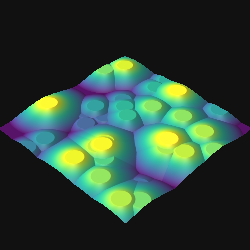

In [47]:
# Visualize in 3D
map3d = gj.Map3D(width=250, height=250)
map3d.render(
    elevation_map="random_earthworks",
    height=1000,
    zexag=1,
    perspective=25,
    bgcolor=[17, 17, 17],
)
map3d.show()